In [2]:
import pandas as pd
import numpy as np

In [3]:
# Task-1: Removing Null Values
house = pd.read_csv('/content/sample_data/Housing Price Prediction Data.csv')
house.head(3)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4.0,1,Rural,1969,215355.2836
1,2459,3.0,2,Rural,1980,195014.2216
2,1860,2.0,1,Suburb,1970,306891.0121


In [4]:
print("Initial shape of dataset:", house.shape)

Initial shape of dataset: (3502, 6)


In [5]:
house.isnull().sum()

,0
SquareFeet,0
Bedrooms,35
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


In [6]:
# There are 35 rows with null value in the bedrooms column. So, will remove those  35 rows
print("Number of rows with null values in Bedroom column: ", house['Bedrooms'].isnull().sum())

# New set of the house dataset after reoving null values
house = house[house['Bedrooms'].notnull()]

# The new shape of the dataframe
print("Shape after removing null values: ", house.shape)

Number of rows with null values in Bedroom column:  35
Shape after removing null values:  (3467, 6)


In [7]:
print("Shape after dropping:", house.shape)
house.isnull().sum()
# As there are no other columns with null values now.
# So, there is no need to remove null values or impute missing values for any column.

Shape after dropping: (3467, 6)


,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


In [8]:
# Task-2: Removing duplicate rows (if present)
# checking if there are any duplicate rows in the dataset
duplicates_exist = house.duplicated().any()
print(duplicates_exist)
# As there ae no duplicate rows, there is no need to remove any rows

False


In [9]:
# Task-03: Handling categorical variables
# Let's see what featueres the dataset has
house.keys()

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [10]:
house['SquareFeet'].unique()
# Already in number. So, there is no need to encode the values

array([2126, 2459, 1860, ..., 1944, 2936, 2878])

In [11]:
house['Bedrooms'].unique()
# Already in number. So, there is no need to encode the values

array([4., 3., 2., 5.])

In [12]:
house['Bathrooms'].unique()
# Already in number. So, there is no need to encode the values

array([1, 2, 3])

In [13]:
house['Neighborhood'].unique()
# The output is in strings and there are only 3 unique values. So, need to encode it.

array(['Rural', 'Suburb', 'Urban'], dtype=object)

In [14]:
house['YearBuilt'].unique()
# Already in number. So, there is no need to encode the values

array([1969, 1980, 1970, 1996, 2001, 2020, 1993, 1957, 1959, 1960, 2016,
       1962, 2007, 1994, 1992, 2013, 1988, 1989, 2000, 2015, 2014, 1983,
       1961, 1972, 2017, 2002, 1985, 1963, 1975, 2004, 2012, 2019, 1995,
       1986, 1965, 1981, 1956, 1954, 2021, 1958, 1971, 2005, 1977, 1984,
       1982, 1997, 2003, 1951, 1999, 1978, 1964, 1952, 2018, 1953, 1968,
       1966, 1955, 1967, 1987, 2008, 1950, 1998, 1976, 1991, 2010, 1973,
       2011, 1990, 1979, 2006, 1974, 2009])

In [15]:
house['Price'].unique()
# Already in number. So, there is no need to encode the values

array([215355.2836, 195014.2216, 306891.0121, ..., 182859.9475,
       256195.7758, 225565.5271])

In [16]:
# Encoding the Neighborhood column:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

# Apply the encoding to the "Neighborhood" column
house['Neighborhood'] = house['Neighborhood'].map({'Rural': 1, 'Suburb': 2, 'Urban': 3}) #

# New neighborhood columns
print(house['Neighborhood'].head())


0    1
1    1
2    2
3    3
4    2
Name: Neighborhood, dtype: int64


In [17]:
# the updated dataset where all the features are numbers
house.head(3)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4.0,1,1,1969,215355.2836
1,2459,3.0,2,1,1980,195014.2216
2,1860,2.0,1,2,1970,306891.0121


In [18]:
# creating data and target dataframe to split data for training and testing and checking for corelations
data = house.drop(columns= ['Price'])
target = house['Price']
print(data)


      SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt
0           2126       4.0          1             1       1969
1           2459       3.0          2             1       1980
2           1860       2.0          1             2       1970
3           2294       2.0          1             3       1996
4           2130       5.0          2             2       2001
...          ...       ...        ...           ...        ...
3497        1448       5.0          1             1       1988
3498        1086       2.0          1             1       2017
3499        1100       5.0          2             1       1989
3500        2031       4.0          3             1       1965
3501        1844       2.0          3             1       2011

[3467 rows x 5 columns]


In [19]:
# splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

In [20]:
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 SquareFeet      1000.0
Bedrooms           2.0
Bathrooms          1.0
Neighborhood       1.0
YearBuilt       1950.0
dtype: float64
per-feature maximum before scaling:
 SquareFeet      2999.0
Bedrooms           5.0
Bathrooms          3.0
Neighborhood       3.0
YearBuilt       2021.0
dtype: float64


In [21]:
# Scaling Datapoints
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [22]:
# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1.]


In [24]:
X_train.keys()

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt'], dtype='object')

In [25]:
# Removing 1-2 variables using correlation as feature selection
# checking for corelation
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt'])
house_corr = X_train_scaled_df.corr()
house_corr

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
SquareFeet,1.000000,0.008130,-0.040345,-0.000737,0.009702
Bedrooms,0.008130,1.000000,0.038760,-0.023522,0.016307
Bathrooms,-0.040345,0.038760,1.000000,-0.041536,0.019645
Neighborhood,-0.000737,-0.023522,-0.041536,1.000000,-0.023290
YearBuilt,0.009702,0.016307,0.019645,-0.023290,1.000000


<Axes: >

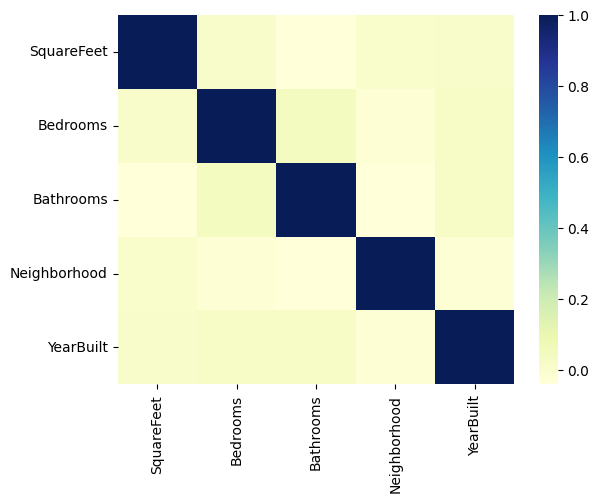

In [26]:
# using heatmaps to find corelations
import seaborn as sns
sns.heatmap(house_corr, cmap = 'YlGnBu')


In [27]:
# As we can see from the above heatmap, there are no features that are highly corelated.
# So, we don't have to drop any features here.
# If there was we would use the below code:
# house = house.drop('Dropped_column_name' , axis=1)

Assignment-5 [Linear Regression]

In [49]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train_scaled, y_train)
yPrediction = clf.predict(X_test_scaled)
yPrediction



array([284244.11614822, 231142.09591278, 195341.26637876, 271547.80815468,
       198393.86648816, 283121.15792326, 197549.05010367, 199943.38665032,
       146942.62792038, 207786.67764552, 264980.44086686, 229323.63165647,
       175823.51804041, 294631.47812813, 172932.42861471, 323044.5973633 ,
       170740.0290513 , 150979.8182134 , 299413.162023  , 267988.57097818,
       146530.73113504, 214405.51032176, 309080.92168119, 217221.15523464,
       178520.50968481, 158849.85420826, 249889.88598577, 175487.26416612,
       255718.29542141, 191234.69717841, 237454.81768632, 153165.85361654,
       231726.44725306, 135358.01840994, 268740.50225137, 232891.44835953,
       242256.95319073, 232859.53637498, 197323.1732602 , 220980.81696807,
       168137.53666048, 144141.68711709, 278076.07124247, 207295.37340522,
       268980.10027855, 286111.85331474, 236234.44597381, 312097.41367648,
       183688.90755327, 270486.53587419, 230744.48133123, 291470.31576338,
       166365.05638801, 2

In [50]:
from sklearn.metrics import mean_squared_error


rmse = mean_squared_error(y_test, yPrediction, squared=False)

mean_y_test = np.mean(y_test)


percentage_error = (rmse / mean_y_test) * 100
print("Accuracy Percentage(RMSE%):", 100-percentage_error)


Accuracy Percentage(RMSE%): 78.04104074792923


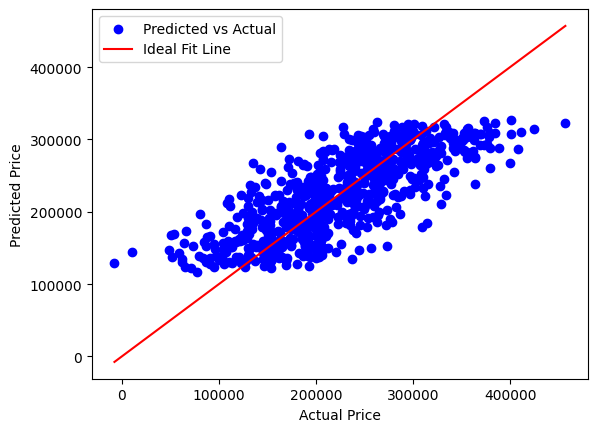

In [51]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.scatter(y_test, yPrediction, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Fit Line')  # Line for perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [53]:

average_price = house['Price'].mean()

house['PriceCategory'] = np.where(house['Price'] < average_price, 0, 1)
print(house[['Price', 'PriceCategory']].head())

         Price  PriceCategory
0  215355.2836              0
1  195014.2216              0
2  306891.0121              1
3  206786.7872              0
4  272436.2391              1


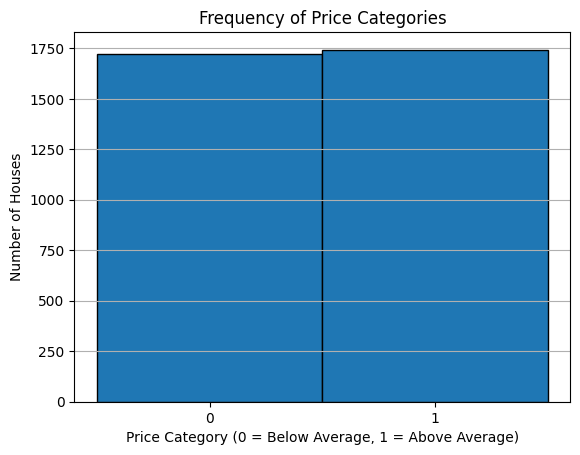

In [54]:
# Checking for biasness
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.hist(house['PriceCategory'], bins=np.arange(-0.5, 2, 1), edgecolor='black')
ax.set_title('Frequency of Price Categories')
ax.set_xlabel('Price Category (0 = Below Average, 1 = Above Average)')
ax.set_ylabel('Number of Houses')


plt.xticks([0, 1])
plt.grid(axis='y')
plt.show()

In [55]:

target_class = house['PriceCategory']
X_train, X_test, y_train_class, y_test_class = train_test_split(data, target_class, test_size=0.2, random_state=1)

#fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train_class)

# Make predictions
predictions = model.predict(X_test_scaled)
print(predictions)




[1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0
 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0
 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1
 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0
 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1
 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0
 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1
 1 1 1 1 0 0 0 0 0 1 1 0 

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_class, predictions)
accuracy_percentage = accuracy * 100
print("Accuracy Percentage: {:.2f}%".format(accuracy_percentage))

Accuracy Percentage: 80.55%
